In [1]:
!pip install beautifulsoup4
# The 3 libraries for scraping 

import pandas as pd
import requests

from bs4 import BeautifulSoup
import requests # library to handle requests
import pandas as pd # library for data analsysis

# Easier to get the HTML table content into an actual table 
from IPython.display import Image # libraries for displaying images

import numpy as np # library to handle data in a vectorized manner

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

## I. Getting the data

### A. Scrapig the data on Wikipedia via Beautiful Soup

In [2]:
url = "https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df = df_list[0]
df.head()

,"Arrondissement[1],[n 1]",Quartiers,Quartiers.1,Population en1999 (hab.)[2],Superficie(ha)[2],Densitéhab/km2,Plan
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 672,869,1 924,NaN
1,1er arrondissementdit « du Louvre »,2e,Halles,8 984,412,21 806,NaN
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,3 195,274,11 661,NaN
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,3 044,269,11 316,NaN
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,1 345,188,7 154,NaN


In [3]:
df.drop(df.iloc[:,[3,4,6]], inplace = True, axis = 1)
df.head()

,"Arrondissement[1],[n 1]",Quartiers,Quartiers.1,Densitéhab/km2
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 924
1,1er arrondissementdit « du Louvre »,2e,Halles,21 806
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,11 661
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,11 316
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,7 154


In [4]:
df= df.rename(columns={'Arrondissement[1],[n 1]' : 'Arrondissement', 'Quartiers' : 'Quartier Num', 
                       'Quartiers.1' : 'Quartier Name', 'Densitéhab/km2' : 'Densité'})
df.head()

,Arrondissement,Quartier Num,Quartier Name,Densité
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 924
1,1er arrondissementdit « du Louvre »,2e,Halles,21 806
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,11 661
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,11 316
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,7 154


In [5]:
df['Arrondissement'] = df['Arrondissement'].str[:2]
df['Arrondissement'] = df['Arrondissement'].str.replace('s', '')
df['Arrondissement'] = df['Arrondissement'].str.replace('n','')
df['Arrondissement'] = df['Arrondissement'].str.replace('r','')
df['Arrondissement'] = df['Arrondissement'].str.replace('t','')
df['Arrondissement'] = df['Arrondissement'].str.replace('er','')
df['Arrondissement'] = df['Arrondissement'].str.replace('e','')
df['Arrondissement'] = df['Arrondissement'].str.replace('er','')
df['Quartier Num'] = df['Quartier Num'].str.replace('er','')
df['Quartier Num'] = df['Quartier Num'].str.replace('e','')
df['Densité'] = df['Densité'].str.replace('\xa0','') #I remove de space between the 'non-breaking spaces' so I can convert the Density
                                                    # into float 
df.head()

,Arrondissement,Quartier Num,Quartier Name,Densité
0,1,1,Saint-Germain-l'Auxerrois,1924
1,1,2,Halles,21806
2,1,3,Palais-Royal,11661
3,1,4,Place-Vendôme,11316
4,2,5,Gaillon,7154


In [6]:
df['Densité'] = pd.to_numeric(df['Densité'])

In [7]:
df.dtypes

Arrondissement    object
Quartier Num      object
Quartier Name     object
Densité            int64
dtype: object

### B. Obtaining geolocation parameters via Geocoder

#### Geographical coordinates of the Quartiers

In [8]:
# define the dataframe columns
column_names = ['Arrondissement', 'Quartier', 'Latitude', 'Longitude', 'Densité'] 

# instantiate the dataframe
Quartiers = pd.DataFrame(columns=column_names)
Quartiers

,Arrondissement,Quartier,Latitude,Longitude,Densité


In [9]:
for i, j, k in zip(df['Quartier Name'], df['Arrondissement'], df['Densité']):
    Arrondissement = j
    Densité = k
    address = 'Paris ' + i
    geolocator = Nominatim(user_agent="Mathis Doulson")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Quartiers = Quartiers.append({'Arrondissement': Arrondissement,
                          'Quartier': address,
                          'Latitude' : latitude,
                          'Longitude' : longitude,
                           'Densité' : Densité }, ignore_index=True)
    print('The geograpical coordinate of Paris', i , 'are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris Saint-Germain-l'Auxerrois are 48.860211199999995, 2.3362988847682233.
The geograpical coordinate of Paris Halles are 48.8646144, 2.334396.
The geograpical coordinate of Paris Palais-Royal are 48.8646388, 2.335815102063103.
The geograpical coordinate of Paris Place-Vendôme are 48.867463400000005, 2.329428116825194.
The geograpical coordinate of Paris Gaillon are 48.869135150000005, 2.332908770335507.
The geograpical coordinate of Paris Vivienne are 48.86885895, 2.3393625582679.
The geograpical coordinate of Paris Mail are 48.8680539, 2.344592949731121.
The geograpical coordinate of Paris Bonne-Nouvelle are 48.8702836, 2.3508959.
The geograpical coordinate of Paris Arts-et-Métiers are 48.8666934, 2.3539857.
The geograpical coordinate of Paris Enfants-Rouges are 48.864240949999996, 2.3625854822185506.
The geograpical coordinate of Paris Archives are 48.862533, 2.3594595.
The geograpical coordinate of Paris Sainte-Avoye are 48.862699750000004, 2.35413547

In [10]:
Quartiers.head()

,Arrondissement,Quartier,Latitude,Longitude,Densité
0,1,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,1924
1,1,Paris Halles,48.864614,2.334396,21806
2,1,Paris Palais-Royal,48.864639,2.335815,11661
3,1,Paris Place-Vendôme,48.867463,2.329428,11316
4,2,Paris Gaillon,48.869135,2.332909,7154


#### Display on the map of the different quarters

In [11]:
address = 'Paris'

geolocator = Nominatim(user_agent="Mathis Doulson")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [12]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, Quartier in zip(Quartiers['Latitude'], Quartiers['Longitude'], Quartiers['Quartier']):
    label = '{}'.format(Quartier)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## C. Getting the most famous venues via Foursquare API

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = '2CM31BSM4Y34GOANQH5EYJZEOMLT43RWDPFXPBCKAGMUHKXC' # your Foursquare ID
CLIENT_SECRET = 'ITVVSM1EY51OUT4F5AAP3IAKOPIQRKAN0OKLIQQLSZBZ4WEG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2CM31BSM4Y34GOANQH5EYJZEOMLT43RWDPFXPBCKAGMUHKXC
CLIENT_SECRET:ITVVSM1EY51OUT4F5AAP3IAKOPIQRKAN0OKLIQQLSZBZ4WEG


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quartier', 
                  'Quartier Latitude', 
                  'Quartier Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
Paris_venues = getNearbyVenues(names=Quartiers['Quartier'],
                                   latitudes=Quartiers['Latitude'],
                                   longitudes=Quartiers['Longitude'])

Paris Saint-Germain-l'Auxerrois
Paris Halles
Paris Palais-Royal
Paris Place-Vendôme
Paris Gaillon
Paris Vivienne
Paris Mail
Paris Bonne-Nouvelle
Paris Arts-et-Métiers
Paris Enfants-Rouges
Paris Archives
Paris Sainte-Avoye
Paris Saint-Merri
Paris Saint-Gervais
Paris Arsenal
Paris Notre-Dame
Paris Saint-Victor
Paris Jardin-des-Plantes
Paris Val-de-Grâce
Paris Sorbonne
Paris Monnaie
Paris Odéon
Paris Notre-Dame-des-Champs
Paris Saint-Germain-des-Prés
Paris Saint-Thomas-d'Aquin
Paris Invalides
Paris École-Militaire
Paris Gros-Caillou
Paris Champs-Élysées
Paris Faubourg-du-Roule
Paris Madeleine
Paris Europe
Paris Saint-Georges
Paris Chaussée-d'Antin
Paris Faubourg-Montmartre
Paris Rochechouart
Paris Saint-Vincent-de-Paul
Paris Porte-Saint-Denis
Paris Porte-Saint-Martin
Paris Hôpital-Saint-Louis
Paris Folie-Méricourt
Paris Saint-Ambroise
Paris Roquette
Paris Sainte-Marguerite
Paris Bel-Air
Paris Picpus
Paris Bercy
Paris Quinze-Vingts
Paris Salpêtrière
Paris Gare
Paris Maison-Blanche
Paris Cr

In [16]:
Paris_venues.head()

,Quartier,Quartier Latitude,Quartier Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
1,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
2,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Musée du Louvre,48.860847,2.336440,Art Museum
3,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Cour Napoléon,48.861172,2.335088,Plaza
4,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Pont des Arts,48.858565,2.337635,Bridge


In [17]:
Paris_venues.shape

(2819, 7)

In [18]:
Paris_venues['Venue Category'] = Paris_venues['Venue Category'].str.replace('Coffee Shop','Café')

### Most frequent venues categories

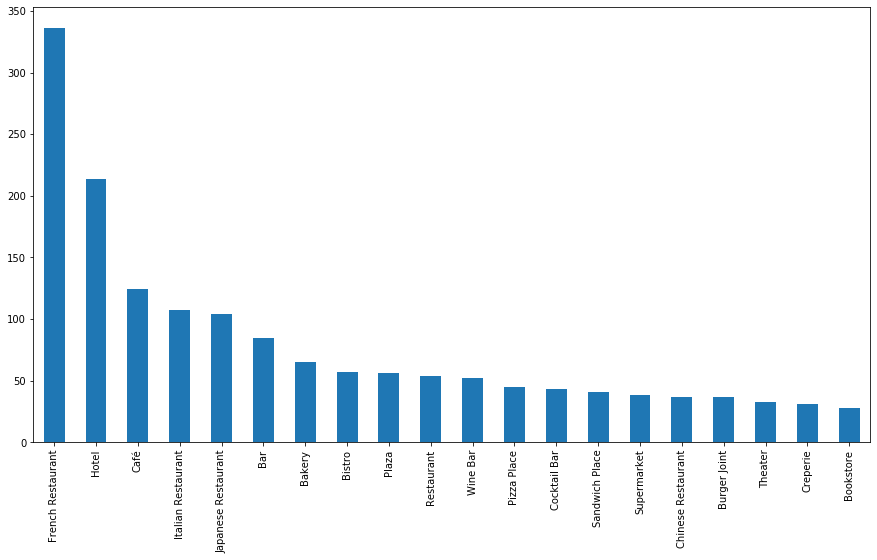

In [19]:
Venues_categories_grouped = Paris_venues['Venue Category'].value_counts(sort=True)
f, ax = plt.subplots(figsize=(15,8))
Venues_categories_grouped.iloc[0:20].plot(ax=ax, kind='bar')

In [20]:
Paris_venues_grouped = Paris_venues.groupby('Quartier').count()
Paris_venues_grouped

,Quartier Latitude,Quartier Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Quartier,,,,,,
Paris Amérique,5,5,5,5,5,5
Paris Archives,17,17,17,17,17,17
Paris Arsenal,17,17,17,17,17,17
Paris Arts-et-Métiers,50,50,50,50,50,50
Paris Auteuil,17,17,17,17,17,17
Paris Batignolles,62,62,62,62,62,62
Paris Bel-Air,8,8,8,8,8,8
Paris Belleville,44,44,44,44,44,44
Paris Bercy,14,14,14,14,14,14


In [21]:
Paris_venues = Paris_venues.groupby('Quartier').filter(lambda x: x['Quartier'].count() >= 8)
Paris_venues.shape

(2803, 7)

In [22]:
Paris_venues_grouped = Paris_venues['Quartier'].value_counts(sort=True)
Paris_venues_grouped

Paris Place-Vendôme                97
Paris Folie-Méricourt              83
Paris Saint-Gervais                79
Paris Montparnasse                 77
Paris Palais-Royal                 76
Paris Halles                       76
Paris Mail                         72
Paris Faubourg-Montmartre          72
Paris Chaussée-d'Antin             71
Paris Gaillon                      69
Paris École-Militaire              69
Paris Sainte-Avoye                 68
Paris Saint-Germain-des-Prés       67
Paris Enfants-Rouges               65
Paris Porte-Saint-Martin           65
Paris Rochechouart                 64
Paris Batignolles                  62
Paris Quinze-Vingts                61
Paris Saint-Georges                61
Paris Saint-Merri                  60
Paris Gros-Caillou                 58
Paris Sorbonne                     57
Paris Monnaie                      56
Paris Notre-Dame-des-Champs        56
Paris Arts-et-Métiers              50
Paris Saint-Thomas-d'Aquin         47
Paris Roquet

### Number of venues observed on Foursquare per quarter

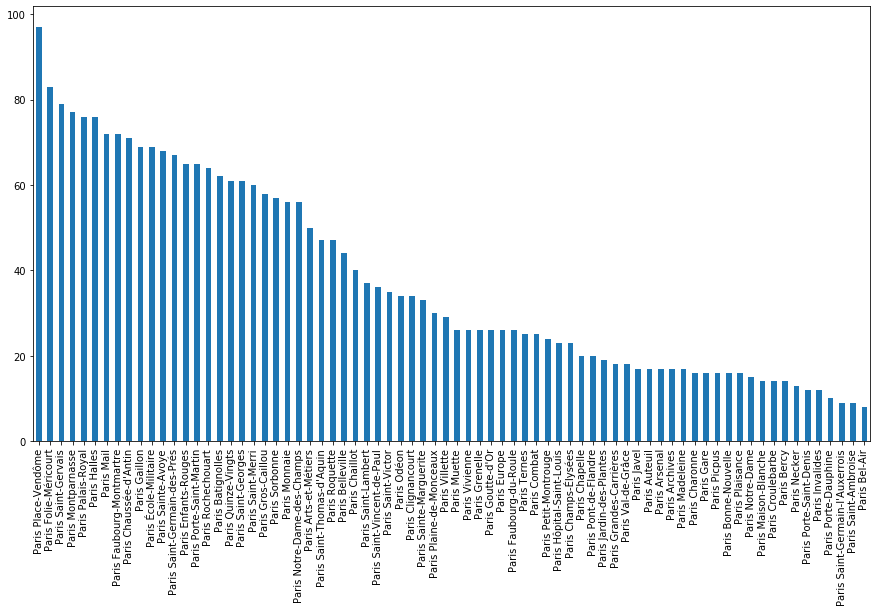

In [23]:
f, ax = plt.subplots(figsize=(15,8))
Paris_venues_grouped.plot(ax=ax, kind='bar')

In [24]:
# We now have 74 quarters instead of the 80 original
Paris_venues_grouped.shape

(74,)

### Pre-processing the data

In [25]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Paris_onehot['Quartier'] = Paris_venues['Quartier'] 

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,Quartier,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Paris_grouped = Paris_onehot.groupby('Quartier').mean().reset_index()
Paris_grouped

,Quartier,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Paris Archives,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.0,0.0
1,Paris Arsenal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Paris Arts-et-Métiers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.0,0.0
3,Paris Auteuil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.0,0.0
4,Paris Batignolles,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.048387,0.000000,0.000000,0.000000,0.0,0.0
5,Paris Bel-Air,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,Paris Belleville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022727,0.000000,0.000000,0.068182,0.045455,0.000000,0.000000,0.000000,0.0,0.0
7,Paris Bercy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,Paris Bonne-Nouvelle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,Paris Chaillot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.0,0.0


#### Let's print each neighborhood along with the top 5 most common venues


In [27]:
num_top_venues = 5

for Quarters in Paris_grouped['Quartier']:
    print("----"+Quarters+"----")
    temp = Paris_grouped[Paris_grouped['Quartier'] == Quarters].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Paris Archives----
                    venue  freq
0          Sandwich Place  0.18
1     Japanese Restaurant  0.12
2            Burger Joint  0.06
3  Okonomiyaki Restaurant  0.06
4       Health Food Store  0.06


----Paris Arsenal----
               venue  freq
0  French Restaurant  0.35
1       Cocktail Bar  0.12
2                Spa  0.06
3       Gourmet Shop  0.06
4             Museum  0.06


----Paris Arts-et-Métiers----
                 venue  freq
0                  Bar  0.08
1    French Restaurant  0.08
2  Japanese Restaurant  0.06
3   Chinese Restaurant  0.06
4         Cocktail Bar  0.06


----Paris Auteuil----
                venue  freq
0   French Restaurant  0.24
1  Italian Restaurant  0.12
2              Market  0.06
3       Deli / Bodega  0.06
4              Bistro  0.06


----Paris Batignolles----
               venue  freq
0  French Restaurant  0.15
1        Pizza Place  0.10
2              Hotel  0.08
3    Thai Restaurant  0.05
4           Wine Bar  0.05


----Paris

               venue  freq
0  French Restaurant  0.16
1               Café  0.07
2              Hotel  0.07
3     Sandwich Place  0.05
4             Bakery  0.05


----Paris Odéon----
                venue  freq
0      Sandwich Place  0.06
1  Italian Restaurant  0.06
2         Supermarket  0.06
3      Ice Cream Shop  0.06
4            Wine Bar  0.06


----Paris Palais-Royal----
                 venue  freq
0  Japanese Restaurant  0.13
1                 Café  0.09
2    French Restaurant  0.08
3                Hotel  0.08
4   Italian Restaurant  0.05


----Paris Petit-Montrouge----
                venue  freq
0   French Restaurant  0.12
1               Hotel  0.12
2              Bistro  0.08
3  Athletics & Sports  0.04
4   Mobile Phone Shop  0.04


----Paris Picpus----
                 venue  freq
0  Japanese Restaurant  0.12
1                Hotel  0.12
2      Thai Restaurant  0.06
3    Convenience Store  0.06
4        Historic Site  0.06


----Paris Place-Vendôme----
                ve

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Quartier']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Paris_venues_sorted = pd.DataFrame(columns=columns)
Paris_venues_sorted['Quartier'] = Paris_grouped['Quartier']

for ind in np.arange(Paris_grouped.shape[0]):
    Paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

Paris_venues_sorted.head(10)

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Paris Archives,Sandwich Place,Japanese Restaurant,Health Food Store,Burger Joint,Farmers Market,Bistro,Supermarket,Garden
1,Paris Arsenal,French Restaurant,Cocktail Bar,Gourmet Shop,Park,Gym,Supermarket,Vegetarian / Vegan Restaurant,Tapas Restaurant
2,Paris Arts-et-Métiers,Bar,French Restaurant,Japanese Restaurant,Cocktail Bar,Chinese Restaurant,Gastropub,Restaurant,Hotel
3,Paris Auteuil,French Restaurant,Italian Restaurant,Bistro,Market,Wine Shop,Deli / Bodega,Pizza Place,Dessert Shop
4,Paris Batignolles,French Restaurant,Pizza Place,Hotel,Wine Bar,Thai Restaurant,Bakery,Creperie,Café
5,Paris Bel-Air,Spanish Restaurant,Sushi Restaurant,Indian Restaurant,Ice Cream Shop,French Restaurant,Pizza Place,Chinese Restaurant,Salon / Barbershop
6,Paris Belleville,Bar,Chinese Restaurant,Vietnamese Restaurant,Supermarket,French Restaurant,Café,Wine Bar,Dim Sum Restaurant
7,Paris Bercy,French Restaurant,Hotel,Convenience Store,Museum,Restaurant,Brasserie,Lounge,Beer Garden
8,Paris Bonne-Nouvelle,Bar,Indie Movie Theater,Restaurant,Cheese Shop,Theater,Clothing Store,Cocktail Bar,Steakhouse
9,Paris Chaillot,French Restaurant,Art Museum,Lebanese Restaurant,Chinese Restaurant,Museum,Italian Restaurant,Café,Plaza


In [30]:
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))

There are 250 uniques categories.


# II. Cluster quarters

### A. Find the best k

In [31]:
#find the best k

Paris_grouped_clustering = Paris_grouped.drop('Quartier', 1)

best_k = []
for k in range (1, 45):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Paris_grouped_clustering)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans.labels_

    # Sum of distances of samples to their closest cluster center
    inertia = kmeans.inertia_
    best_k.append([k,inertia])
    print ("k:",k, " cost:", inertia)
best_k = pd.DataFrame(best_k)
best_k.columns = ['k', 'Cost']
best_k

k: 1  cost: 3.917940435658269
k: 2  cost: 3.480836041323197
k: 3  cost: 3.293207516911627
k: 4  cost: 3.1674708088410792
k: 5  cost: 3.008858072096296
k: 6  cost: 2.8713987280412305
k: 7  cost: 2.671841654844894
k: 8  cost: 2.5768506802349993
k: 9  cost: 2.4954894721010947
k: 10  cost: 2.3966291501153454
k: 11  cost: 2.251883380692892
k: 12  cost: 2.1668000511478915
k: 13  cost: 2.0902626163384777
k: 14  cost: 2.0338931809023286
k: 15  cost: 1.9061426068799496
k: 16  cost: 1.8522699058284502
k: 17  cost: 1.7957776674959045
k: 18  cost: 1.7344563151380157
k: 19  cost: 1.648574345281802
k: 20  cost: 1.595671035171857
k: 21  cost: 1.5082074829956782
k: 22  cost: 1.4258523852734502
k: 23  cost: 1.3810745935282112
k: 24  cost: 1.3245742722845968
k: 25  cost: 1.2745574236049657
k: 26  cost: 1.2344753969339803
k: 27  cost: 1.1849909130955183
k: 28  cost: 1.1303768219454409
k: 29  cost: 1.0854029489606594
k: 30  cost: 1.0319105197571758
k: 31  cost: 0.9940101329059181
k: 32  cost: 0.9371477321

,k,Cost
0,1,3.917940
1,2,3.480836
2,3,3.293208
3,4,3.167471
4,5,3.008858
5,6,2.871399
6,7,2.671842
7,8,2.576851
8,9,2.495489
9,10,2.396629


In [1]:
#plot cost values of k's as calculated above, to find best k value ('elbow')
plt.scatter(best_k['k'],best_k['Cost'])
plt.title("Scatter plot of Number of Clusters (k) vs Cost")
plt.ylabel("Cost")
plt.xlabel("Number of Cluster (k)")
plt.show

NameError: name 'plt' is not defined

### B. K means Algorithm

In [33]:
#cluster Quarters by best k (lowest cost as calculated above, but at the same time fitting the data - see 'elbow' of line plot)
# best k value is set at 8 
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 3, 3, 3, 3, 3, 1, 2, 3])

In [34]:
# add clustering labels
Paris_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Paris_merged = Quartiers

# merge Quartiers (containing Arrondissements and Quartiers) with Paris Venues to add latitude/longitude for each Quartiers
Paris_merged = Quartiers.merge(Paris_venues_sorted.set_index('Quartier'), how='right', on='Quartier')

Paris_merged.head() 

,Arrondissement,Quartier,Latitude,Longitude,Densité,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,1,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,1924,4,Plaza,Pedestrian Plaza,Art Museum,Shopping Mall,Exhibit,Historic Site,Government Building,Bridge
1,1,Paris Halles,48.864614,2.334396,21806,0,Japanese Restaurant,Café,Hotel,Italian Restaurant,French Restaurant,Korean Restaurant,Cosmetics Shop,Plaza
2,1,Paris Palais-Royal,48.864639,2.335815,11661,0,Japanese Restaurant,Café,Hotel,French Restaurant,Italian Restaurant,Cosmetics Shop,Korean Restaurant,Udon Restaurant
3,1,Paris Place-Vendôme,48.867463,2.329428,11316,1,Hotel,French Restaurant,Jewelry Store,Cocktail Bar,Italian Restaurant,Japanese Restaurant,Chocolate Shop,Hotel Bar
4,2,Paris Gaillon,48.869135,2.332909,7154,0,Hotel,Jewelry Store,Japanese Restaurant,Italian Restaurant,Café,Plaza,French Restaurant,Historic Site


### C. Display the different clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'], Paris_merged['Longitude'], Paris_merged['Quartier'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## III. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1 

In [37]:
Cluster_1 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 0, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_1

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Paris Halles,Japanese Restaurant,Café,Hotel,Italian Restaurant,French Restaurant,Korean Restaurant,Cosmetics Shop,Plaza
2,Paris Palais-Royal,Japanese Restaurant,Café,Hotel,French Restaurant,Italian Restaurant,Cosmetics Shop,Korean Restaurant,Udon Restaurant
4,Paris Gaillon,Hotel,Jewelry Store,Japanese Restaurant,Italian Restaurant,Café,Plaza,French Restaurant,Historic Site
5,Paris Vivienne,Wine Bar,Pedestrian Plaza,Japanese Restaurant,French Restaurant,Plaza,Bookstore,Bistro,English Restaurant
6,Paris Mail,Bakery,Cocktail Bar,French Restaurant,Wine Bar,Salad Place,Bar,Bistro,Burger Joint
9,Paris Enfants-Rouges,Wine Bar,French Restaurant,Café,Sandwich Place,Moroccan Restaurant,Hotel,Bistro,Bookstore
10,Paris Archives,Sandwich Place,Japanese Restaurant,Health Food Store,Burger Joint,Farmers Market,Bistro,Supermarket,Garden
12,Paris Saint-Merri,Gay Bar,Art Gallery,French Restaurant,Plaza,Bar,Bakery,Bookstore,Clothing Store
13,Paris Saint-Gervais,French Restaurant,Hotel,Italian Restaurant,Café,Wine Bar,Clothing Store,Gay Bar,Tapas Restaurant
15,Paris Notre-Dame,French Restaurant,Bookstore,Scenic Lookout,Park,Tapas Restaurant,Plaza,Brasserie,Japanese Restaurant


#### Cluster 2 

In [38]:
Cluster_2 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_2

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
3,Paris Place-Vendôme,Hotel,French Restaurant,Jewelry Store,Cocktail Bar,Italian Restaurant,Japanese Restaurant,Chocolate Shop,Hotel Bar
14,Paris Arsenal,French Restaurant,Cocktail Bar,Gourmet Shop,Park,Gym,Supermarket,Vegetarian / Vegan Restaurant,Tapas Restaurant
16,Paris Saint-Victor,French Restaurant,Café,Hotel,Plaza,Wine Bar,Brasserie,Comedy Club,Bistro
20,Paris Monnaie,French Restaurant,Hotel,Restaurant,Japanese Restaurant,Plaza,Sandwich Place,Seafood Restaurant,Museum
25,Paris Invalides,French Restaurant,Plaza,Hotel,Smoke Shop,Train Station,Tea Room,Cultural Center,Flower Shop
26,Paris École-Militaire,Hotel,French Restaurant,Café,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Dessert Shop,Cocktail Bar
27,Paris Gros-Caillou,French Restaurant,Italian Restaurant,Hotel,Café,Bistro,Bakery,Convenience Store,Garden
29,Paris Faubourg-du-Roule,French Restaurant,Hotel,Art Gallery,Cocktail Bar,Spa,Resort,Supermarket,Furniture / Home Store
31,Paris Europe,Hotel,Italian Restaurant,French Restaurant,Café,Thai Restaurant,Pub,Theater,Pizza Place
32,Paris Saint-Georges,French Restaurant,Hotel,Bakery,Lounge,Bar,Plaza,Cupcake Shop,Restaurant


#### Cluster 3 

In [39]:
Cluster_3 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_3

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
7,Paris Bonne-Nouvelle,Bar,Indie Movie Theater,Restaurant,Cheese Shop,Theater,Clothing Store,Cocktail Bar,Steakhouse
37,Paris Porte-Saint-Denis,Bar,Brasserie,Korean Restaurant,Burger Joint,Steakhouse,Bistro,Theater,Clothing Store


#### Cluster 4


In [40]:
Cluster_4 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 3, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_4

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
8,Paris Arts-et-Métiers,Bar,French Restaurant,Japanese Restaurant,Cocktail Bar,Chinese Restaurant,Gastropub,Restaurant,Hotel
11,Paris Sainte-Avoye,French Restaurant,Café,Hotel,Cocktail Bar,Lebanese Restaurant,Japanese Restaurant,Gourmet Shop,Art Museum
22,Paris Notre-Dame-des-Champs,French Restaurant,Hotel,Café,Bakery,Sandwich Place,Steakhouse,Ice Cream Shop,Chinese Restaurant
34,Paris Faubourg-Montmartre,French Restaurant,Hotel,Wine Bar,Pizza Place,Japanese Restaurant,Restaurant,Fish & Chips Shop,Mexican Restaurant
35,Paris Rochechouart,French Restaurant,Restaurant,Bakery,Japanese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Cocktail Bar,Bistro
38,Paris Porte-Saint-Martin,Bar,French Restaurant,Burger Joint,Theater,Turkish Restaurant,Pizza Place,Hotel,Historic Site
39,Paris Hôpital-Saint-Louis,Café,French Restaurant,Wine Bar,Bistro,Bar,Pizza Place,Diner,Southern / Soul Food Restaurant
40,Paris Folie-Méricourt,French Restaurant,Bar,Japanese Restaurant,Bakery,Bistro,Restaurant,Wine Bar,Wine Shop
41,Paris Saint-Ambroise,Electronics Store,Comfort Food Restaurant,Bed & Breakfast,Café,Cocktail Bar,Restaurant,South American Restaurant,Wine Bar
42,Paris Roquette,French Restaurant,Italian Restaurant,Sandwich Place,Café,Bar,Pizza Place,Vietnamese Restaurant,Bistro


#### Cluster 5 

In [41]:
Cluster_5 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 4, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_5

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Paris Saint-Germain-l'Auxerrois,Plaza,Pedestrian Plaza,Art Museum,Shopping Mall,Exhibit,Historic Site,Government Building,Bridge


#### Cluster 6


In [42]:
Cluster_6 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 5, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_6

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
17,Paris Jardin-des-Plantes,Science Museum,Garden,Museum,Botanical Garden,Zoo Exhibit,French Restaurant,Zoo,Asian Restaurant


#### Cluster 7 

In [43]:
Cluster_7 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 6, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_7

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
49,Paris Maison-Blanche,Vietnamese Restaurant,Thai Restaurant,Cantonese Restaurant,Cambodian Restaurant,Gym / Fitness Center,Bakery,Park,Farmers Market


#### Cluster 8


In [44]:
Cluster_8 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 7, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_8

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
68,Paris Chapelle,Indian Restaurant,Supermarket,Hotel,Bakery,Theater,Gym Pool,Metro Station,Grocery Store


### Wordclouds for each cluster

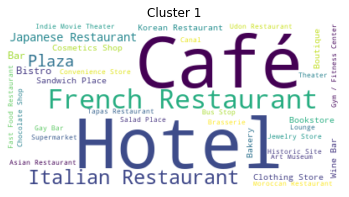

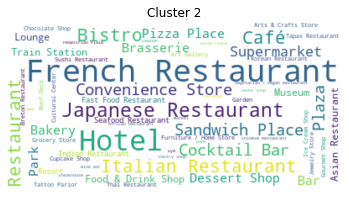

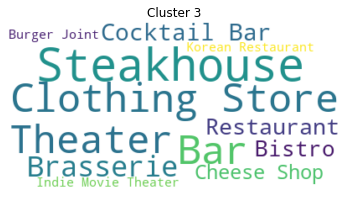

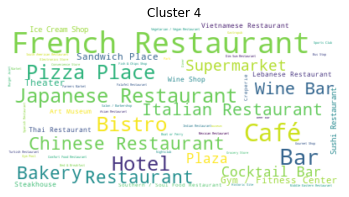

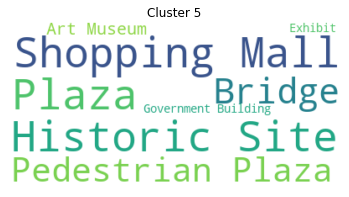

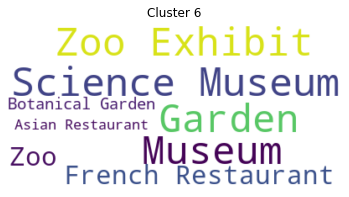

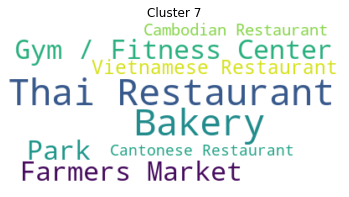

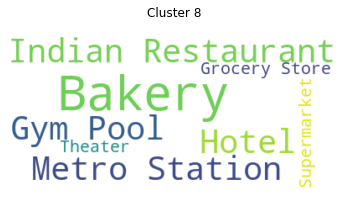

In [55]:
# Start with one review:

for i,j in zip([Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8], range(1,9)) :

# Start with one review:

    # Si l'on veut générér un wordcloud par mot : Cluster_1_string = i.iloc[0:,1:].to_string(header=False) et generate instead of 
    # generate_from_frequencies
    Cluster_1_string = i.iloc[0:,1:].stack().value_counts()

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='white', max_words=60).generate_from_frequencies(Cluster_1_string)

    # Display the generated image:
    plt.title('Cluster {0}'.format(j))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Keep only the quarters from the cluster of interest

In [56]:
Interest_Quarters = Cluster_1
Interest_Quarters = pd.DataFrame(Interest_Quarters.iloc[:, 0])
print(Interest_Quarters.shape)
Interest_Quarters.head()

(11, 1)


,Quartier
1,Paris Halles
2,Paris Palais-Royal
4,Paris Gaillon
9,Paris Enfants-Rouges
13,Paris Saint-Gervais


## IV. Crossing the data with demographic density

In [57]:
Interest_Quarters =  Interest_Quarters.merge(Quartiers.set_index('Quartier'), how='left', on='Quartier')
Interest_Quarters.head()

,Quartier,Arrondissement,Latitude,Longitude,Densité
0,Paris Halles,1,48.864614,2.334396,21806
1,Paris Palais-Royal,1,48.864639,2.335815,11661
2,Paris Gaillon,2,48.869135,2.332909,7154
3,Paris Enfants-Rouges,3,48.864241,2.362585,31478
4,Paris Saint-Gervais,4,48.855581,2.358359,25088


In [58]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, Quartier, Densité in zip(Interest_Quarters['Latitude'], Interest_Quarters['Longitude'], 
                                       Interest_Quarters['Quartier'], Interest_Quarters['Densité']):
    label = '{}'.format(Quartier)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= Densité/3000,
        popup= label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_paris)  
    
map_paris